# My First Project
This is the first project in which I will practice the skills I have been learning along my journey to becoming a data scientist.

In this case, we are going to analyze data from Lending Club. This platform connects borrowers with investors, and manages all financial trades. It operates as a peer to peer lending system regulated by the plataform itself.

The dataset was download from Kaggle - Lending Club Loan Data

Let´s load the provided information as a csv with the library Pandas.

(In SQL we will query, filter, group and transform data efficiently.)

In [67]:
import pandas as pd

#Load dataset
filepath = '/Users/hectorastudillo/Downloads/archive/Lending_data.csv'

data = pd.read_csv(filepath)


/var/folders/kz/rybrs64563zc2gl94rf00qbw0000gn/T/ipykernel_4885/4253356958.py:6: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath)


# Data Exploring
Then, we need to understand our data by summarizing how many columns are in the file, identifying the data type of each one, we also want to analyze the information further and think: How can I use all this data?

- Obtain simple information of the columns, rows, a especific number of entries:
    - .info()
    - .head()
    - .columns
    - num_rows, num_columns = data.shape - This return me 2 variables.

- Obtain an specific column and row 
    - print(data.['Column'][1]) - I can save this into a variable too.
    - ILOC 
        - .iloc[] - This returns the rows specified to you, using the same indexing as arrays.
        - .iloc[] - To create a specific subset
        - .iloc[x,y] - For accesing cells

- Obtain the type and dataset:
    -type(dataset)
    - print(dataset)

- Obtain statitic information: 
    - describe()

In [68]:
#Let´s explore the information in the csv.

print('Data obtained with info()\n', data.info()) # To obtain the infomrmation about the csv columns...

print('Data obtained with head()\n', data.head()) # To obtain the information from the first 5 rows.

print('Data obtained with describe()\n', data.describe()) # To obtain basic statistical information only from numercial columns.

print('Type of data: ', type(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB
Data obtained with info()
 None
Data obtained with head()
    id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN       2500         2500           2500.0   36 months   
1 NaN        NaN      30000        30000          30000.0   60 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       4000         4000           4000.0   36 months   
4 NaN        NaN      30000        30000          30000.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.56        84.92     C        C1  ...                            NaN   
1     18.94       777.23     D        D2  ...                            NaN   
2     17.97       180.69     D        D1  ...                            

# Impressions

- There are too many columns, how can we handle them efficiently?

- There is not available total information in columns, for example ID and member_id, and that could be a problem, because there is not exits information.

# Data not available and duplicated entries.

We need to start making decision for see what do with these data, wheter delete it, complete it. The context-appropriate handling.

Now let´s see the data not available by NUMERICAL (int64) columns, duplicated rows and null data with the following methods:
- .isnull()
- .duplicated()
- .isna() - Returns boolean information.
    - You may combine this method with head() to specify rows or even use ILOC or LOC.


In [69]:
print('Data not avaialbe by int64 columns: \n', data.isnull().sum(), '\n')

print('Data duplicated by rows/entries: \n', data.duplicated().sum())

print('Missing data by column: \n', data.isna().sum())


Data not avaialbe by int64 columns: 
 id                       2260668
member_id                2260668
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
                          ...   
settlement_status        2227612
settlement_date          2227612
settlement_amount        2227612
settlement_percentage    2227612
settlement_term          2227612
Length: 145, dtype: int64 

Data duplicated by rows/entries: 
 0
Missing data by column: 
 id                       2260668
member_id                2260668
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
                          ...   
settlement_status        2227612
settlement_date          2227612
settlement_amount        2227612
settlement_percentage    2227612
settlement_term          2227612
Length: 145, dtype: int64


# Unique values over each column
Now we can see the unique values from each column making an iteration for each one, we obtain this with the following code:

In [70]:
unique_values = {
    col : data[col].unique() for col in data.columns
}
"""
We create a dictionary such that its keys are all the columns called col, then we iterate over each column to obtain its unique values
"For each column into the columns from the dataset, obtain its unique value"

In PANDAS, the notation to specify a column is with [], dataset[column]
"""

# Now let´s start visualizing these values

for col, values in unique_values.items():
    print(f'Column: {col}')
    print(f'Number of unique values: {len(values)}')
    print(f'Unique values: {values[:10]}') # We obtain the first 10 values
    print('-'*20) # Separation 

Column: id
Number of unique values: 1
Unique values: [nan]
--------------------
Column: member_id
Number of unique values: 1
Unique values: [nan]
--------------------
Column: loan_amnt
Number of unique values: 1572
Unique values: [ 2500 30000  5000  4000  5550  2000  6000  5500 28000 11200]
--------------------
Column: funded_amnt
Number of unique values: 1572
Unique values: [ 2500 30000  5000  4000  5550  2000  6000  5500 28000 11200]
--------------------
Column: funded_amnt_inv
Number of unique values: 10057
Unique values: [ 2500. 30000.  5000.  4000.  5550.  2000.  6000.  5500. 28000. 11200.]
--------------------
Column: term
Number of unique values: 2
Unique values: [' 36 months' ' 60 months']
--------------------
Column: int_rate
Number of unique values: 673
Unique values: [13.56 18.94 17.97 16.14 15.02 14.47 22.35 11.31  8.19 12.98]
--------------------
Column: installment
Number of unique values: 93296
Unique values: [ 84.92 777.23 180.69 146.51 731.78 192.45  72.28 203.79 206.4

## Observations
Notice that the dataset have already None into the empty cells, with this applied is easier work the entire dataset.

Now our homework is check if we need to make changes into specific columns that we will handle or not. 


Entire columns without data:
    - Member ID, We may relation its values with another column that satisfies a condition. 
    Even this could be the prumary key of another table, which relates to... another thing for example another loan request.

    - ID, this will be our primary key for SQL, if we are only use Pandas to handle information it maybe not be neccesary, however, for this case we will use SQL and another observation is that teh orignal dataset does not have an idenitifier! That could be a problem **so at very least** we are adding a new identifier.

    - URL
Handle them using SQL

- There is not problem with the column 'desc' this is a description provided by the customerser. We can handle it later.
- mths_since_last_delinq, fill with zeros the gap cells.
- Check 'mths_since_last_record' and 'revol_util'



### Handling date columns.
We are going to fill the columns with "none" because we will plot each column or the correspondent handling and see how fill the gaps, if we can interpolet them or given a determinated value and see whether is important assign a value or not.
This task we may do it with R.

**Remember, you have to create a new dataframe before start cleaning the dataset**

In [ ]:
# Belongs to Cleansing Data:
data_cleaned = data.copy()


#Performace 
# Column Member ID
data_cleaned['mths_since_last_record'] = data_cleaned['mths_since_last_record'].fillna(0)
data_cleaned['id'] = range(1, len(data_cleaned)+1)
data_cleaned['mths_since_last_delinq'] = data_cleaned['mths_since_last_delinq'].fillna(0)




In [ ]:
#Check
print('Data not available in specific column: ', data_cleaned['funded_amnt'].isna().sum())
print('Porcentage of not aveable data: \n', (data_cleaned.isna().sum() / len(data_cleaned)) * 100, '\n')

Data not available in specific column:  0
Porcentage of not aveable data: 
 id                         0.000000
member_id                100.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
                            ...    
settlement_status         98.537777
settlement_date           98.537777
settlement_amount         98.537777
settlement_percentage     98.537777
settlement_term           98.537777
Length: 145, dtype: float64 



# Group by - We are still getting to know our dataset.
## Single groups
There is another function useful for these cases to obtain the unique values from a column, this method counts how many times each unique value appears in the defined column. 
- variable = df['Column']. value_counts()

_It is **stored** into a variable, it does not create a new dataframe!_

We review this method later when we handling columns.

We can also perform operations with these grouped values:
- variable = df.groupby('ColumnToGroup')['ColumnToApplyOperations'].sum() at the end the operation

If we want, we may add operations for each unique value, for example the sum and mean:
- variable = df.groupby(['ColumnToGroup])['ColumnToApplyOpereations].agg(['mean', 'sum'])
**Notice the syntax is different from the previous application with a single operation, for this case we use another method called .agg() and the parameter is a list of operations to apply.**

## We can also make groups of grouped data with the same method .gropuby()


# At this point, you have already known your dataset.

#  Data cleansing
We need to perform data cleaning before stating the analysis. WE NEED TO CREATE A NEW DATAFRAME FOR THAT.

This we will make it with the following methods:
- drop.duplicates()
But for this datset there are not duplicated rows.

## Be careful with the method _dropna()_ it is more strict with rows even if you specify columns.
If we use the method _dropna()_ all the rows with at least one empty cell could be removed! 
And the same for columns if you add the parameter _axis=1_ !
- dropna() using the parameter "subset" to specify a column or columns, remember the notation ['name']
    - dropna(['Column1', 'Column2']) **This REMOVE THE ROWS where there is not information into the specified columns**

## Be careful with data not available - Cleaning the information
- For this case, if we use dropna() all the dataframe will be deleted because there are too many gaps (espacios vacios/faltantes) in all the rows.

- _We could fill these cells or fill only the columns we will working with_
    - .fillna(x)

- There could be a problem with the operations whether we fill numerical columns with zeros, be careful with that.
    - **Perform** an operation with filled and unfilled columns, check their respective outcomes (envolved variables: data, data_cleaned).

- For some cases we may fill this missing information with data statistic specifying the column.
    - mean = data['Column'].mean()
    data = data['Column'].fillna(mean)

## Use "none" value for empty data, be careful.
If there are none values into the empty data from the columns, in the sum this does not have value it is 0, and for counting this are omitted.


# At this point, you have already cleaned your dataset.

# Data analysis 
**Check if you need to creat another dataframe (as we created for data cleansing) or just specify the colums to use**.
I may divide the dataset into category datasets for example, the columns that give information about where live the customersers, a classification by its incomes and relationed columns, their delinquencies, etc., to handle better all the dataset without exeptions. 


## Create DataFrames from a csv (or Series - Unidimensional, similar to an one column)

**__Divide your information into portions for a better analysis, cleaning or extracting of information, it all depends of what you want to do.__**

Example, **we will create a bidimensional length dataframe with numpy and pandas**
    data = np.array([[1,2,3], [4,5,6], [7,8,9]])
    df_from_array = pd.DataFrame(data, columns=['A','B','C']) These are the name of columns.

There is another example creating from dictionaries.




## Take SAMPLES from the dataset to create smaller SUBSETS using ILOC!
- Use ILOC 
    - .iloc[: , :] The first index is for rows and the following for columns.
    - .iloc[] For specific rows
    - .iloc[x,y] For accesing cells

## Knowing the information of specific ROWS OR columns.
- Use LOC
    - .loc[x]
    - .loc[:] For a chuck of rows
    - .loc[:, ['Column']]
    - .loc[: , ['Column1', 'Column2', 'Column3']] Notice that the second parameter is a list, and each column is inside it.




## What you want to solve?
What can we obtain from this dataset that could help in the development of the club?

- We can compute the expected value for some columns, we need to check each one and see if it is useful for us.
- Date more common where customersers apply for a debt.

A customerser could obtain a credit from the club? Can apply?
- I can make a filter for some columns that indicates if the customerser has checks-offs, deliquencies, ratios specifics that contain the dataset.
- Co-borrowers could mean less risk



## We will use specific columns, do not need to use the 150 columns at the same time.
Annual incomes provided by customersers
- We can plot the income amounts of customersers.
- Use statistic tools like quartiles for that specific column.

## Analyze an specific column and row:
- print(data.['Column'][1]) - I can save this into a variable too.
- column_analyzed = data.['Column'].mean() - This previous method may change to our preference.
- .count() uses the same syntax. **Always be careful with null values for every calculation**




## Make operations between columns.
What new columns can we create, add, operate on, or even transform their data type?
For example:
- Make operation with each other: 
    - data_cleaned['NewColumn'] = data_cleaned['Column1'] * data_cleaned['Column2']

- Change the data type of one column: 
    - data_cleaned['ColumnHandle'] = pd.to_datetime(data_cleaned['ColumnHandle'])
    We can check the changes with the method info().

-Divide the information from a column with a data type specific, usually with datetime data:
    - data_cleaned['SubColumns'] = data_cleaned['DatatimeColumn'].dt.year, for example
### Handling colummns, creating new statistical or operational columns, this is the point.

This led us to the following information cell. How can I handle the columns whether I want to make operations between them? 


# Handling columns 
We keep using Pandas, let us define df as the DataFrame we are working with.
- Platform operations between columns
    - df['NewColumn'] = df.['Column1'] **Operation** df.['Column2']

- Boolean values specifying something of our interest.
    - df['NewColumn'] = df.['Column1'] **Condition**

# Them of create the sub-datasets we are will working with...
- Know the data type with method info(), you need notice that there are not non-null data in each one.

## Changing the data type:
We will change the information of the same column, that is why we call the column and them we apply the changes to the same column.
- df['Column'] = pd.to_datetime/type(df['Column'])

## Lambda
We can also create new columns applying lambda funtions **using the method apply()**
    - df['NewColumn'] = df['Column'].apply(lambda x : _operation_). The operation defines the cell´s information.

## Normal Functions
We also have to use the method apply(), we define a functions as we always do in python, there is not difference.
    - Create your functions with conditionals or whatever.
    - Use the same syntax as lamda functions.

In [ ]:
# Getting to know still the information:
 
print('Loan Amount Ststistic Description:\n', data_cleaned['loan_amnt'].describe()) 
print('Loan Amount Ststistic Description:\n', data_cleaned['funded_amnt'].describe()) #The total amount committed to that loan at that point in time.

Loan Amount Ststistic Description:
 count    2.260668e+06
mean     1.504693e+04
std      9.190245e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.290000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64
Loan Amount Ststistic Description:
 count    2.260668e+06
mean     1.504166e+04
std      9.188413e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.287500e+04
75%      2.000000e+04
max      4.000000e+04
Name: funded_amnt, dtype: float64


# Observations
There is not problem using the describe() method, if we only want to check the amounts, it may be more appropiated to start plotting our data, I think that we are still knowing our data. For this case, I think the correspondent graph for this column is a boxplot.

But if you cannot interpretate a boxplot, well, we can still using the numerical information

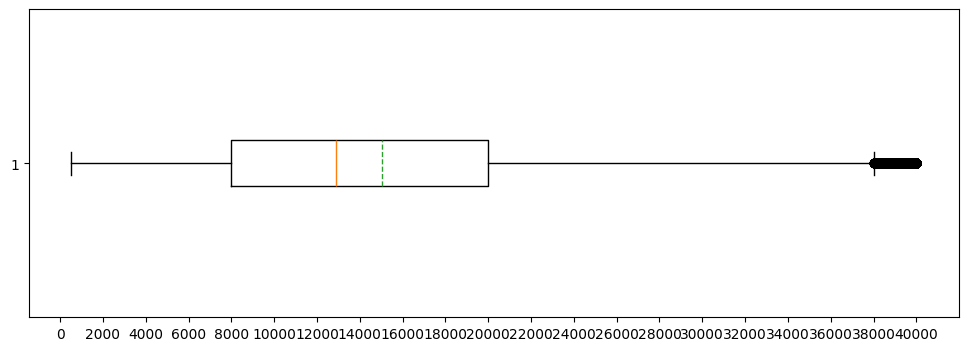

In [111]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 4))

plt.boxplot(data['funded_amnt'], patch_artist=False, notch=False, meanline=True, showmeans=True, showfliers=True, vert=False)

ax.set_xticks(np.arange(0, 41000, 2000))

# Repetimos nombrar nuestros elementos y mostramos.

In [119]:
data_cleaned[data_cleaned['loan_amnt']>=40000]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
55,56,NaN,40000,40000,40000.0,60 months,14.47,940.51,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
152,153,NaN,40000,40000,40000.0,60 months,16.14,975.71,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
197,198,NaN,40000,40000,40000.0,60 months,11.31,875.90,B,B3,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
318,319,NaN,40000,40000,40000.0,60 months,8.19,814.70,A,A4,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
337,338,NaN,40000,40000,40000.0,36 months,8.19,1256.97,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260339,2260340,NaN,40000,40000,40000.0,60 months,20.00,1059.76,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260391,2260392,NaN,40000,40000,39975.0,36 months,30.75,1714.54,F,F5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260419,2260420,NaN,40000,40000,39750.0,36 months,9.44,1280.20,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260426,2260427,NaN,40000,40000,40000.0,36 months,10.42,1298.59,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
